## Task: Predict weekly sales of a walmart store using linear regression

You are provided with a dataset about Walmart's sales in a CSV file.

This is the historical data that covers sales from 2010-02-05 to 2012-11-01, in the file Walmart_Store_sales. Within this file you will find the following fields:

1. Store - the store number
2. Date - the week of sales
3. Weekly_Sales - sales for the given store
4. Holiday_Flag - whether the week is a special holiday week: 1 – Holiday week 0 – Non-holiday week
5. Temperature - Temperature on the day of sale
6. Fuel_Price - Cost of fuel in the region
7. CPI – Prevailing consumer price index
8. Unemployment - Prevailing unemployment rate

Note:

You might find it helpful to include information about the kind of holiday week it is. This is something you'll need to add through data processing.
You can use this information about the holiday weeks.

Holiday Events:
1. Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13
2. Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13
3. Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13
4. Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13

### Tasks:
- Preprocess the data:
    - Remove any column which might not be useful
    - Add holiday type information
    - Normalize the data
- Split the data randomly into training and testing sets (80:20 split)
- Build and train a linear regression model. You can use any framerwork for this (numpy, sklearn or pytorch)
- Evaluate the trained model on test data. Report Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE).
- Visualize model performance using graphs.

In [1]:
from IPython.display import clear_output

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
%pip install gdown==4.5


clear_output()

In [4]:
# Download the CSV file.
!gdown 1UjuHkxE8VSQOdklibKqZ72qodJLBynEv

Downloading...
From: https://drive.google.com/uc?id=1UjuHkxE8VSQOdklibKqZ72qodJLBynEv
To: /content/Walmart.csv
100% 364k/364k [00:00<00:00, 113MB/s]


In [5]:
import pandas as pd
import numpy as np

In [6]:
data_df = pd.read_csv('Walmart.csv')#first we shoud read the dataset

In [7]:
data_df.head()#we can show the firist five

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [8]:
#data prepration
data_y = data_df['Weekly_Sales'] # target
data_x = data_df.drop(['Weekly_Sales'], axis=1) # input features

In [9]:
data_x.head()

,Store,Date,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,0,46.50,2.625,211.350143,8.106


In [10]:
data_y

0       1643690.90
1       1641957.44
2       1611968.17
3       1409727.59
4       1554806.68
           ...    
6430     713173.95
6431     733455.07
6432     734464.36
6433     718125.53
6434     760281.43
Name: Weekly_Sales, Length: 6435, dtype: float64

<ipython-input-11-a87ca2f8f63b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  DataCorr = data_df.corr()


<Axes: >

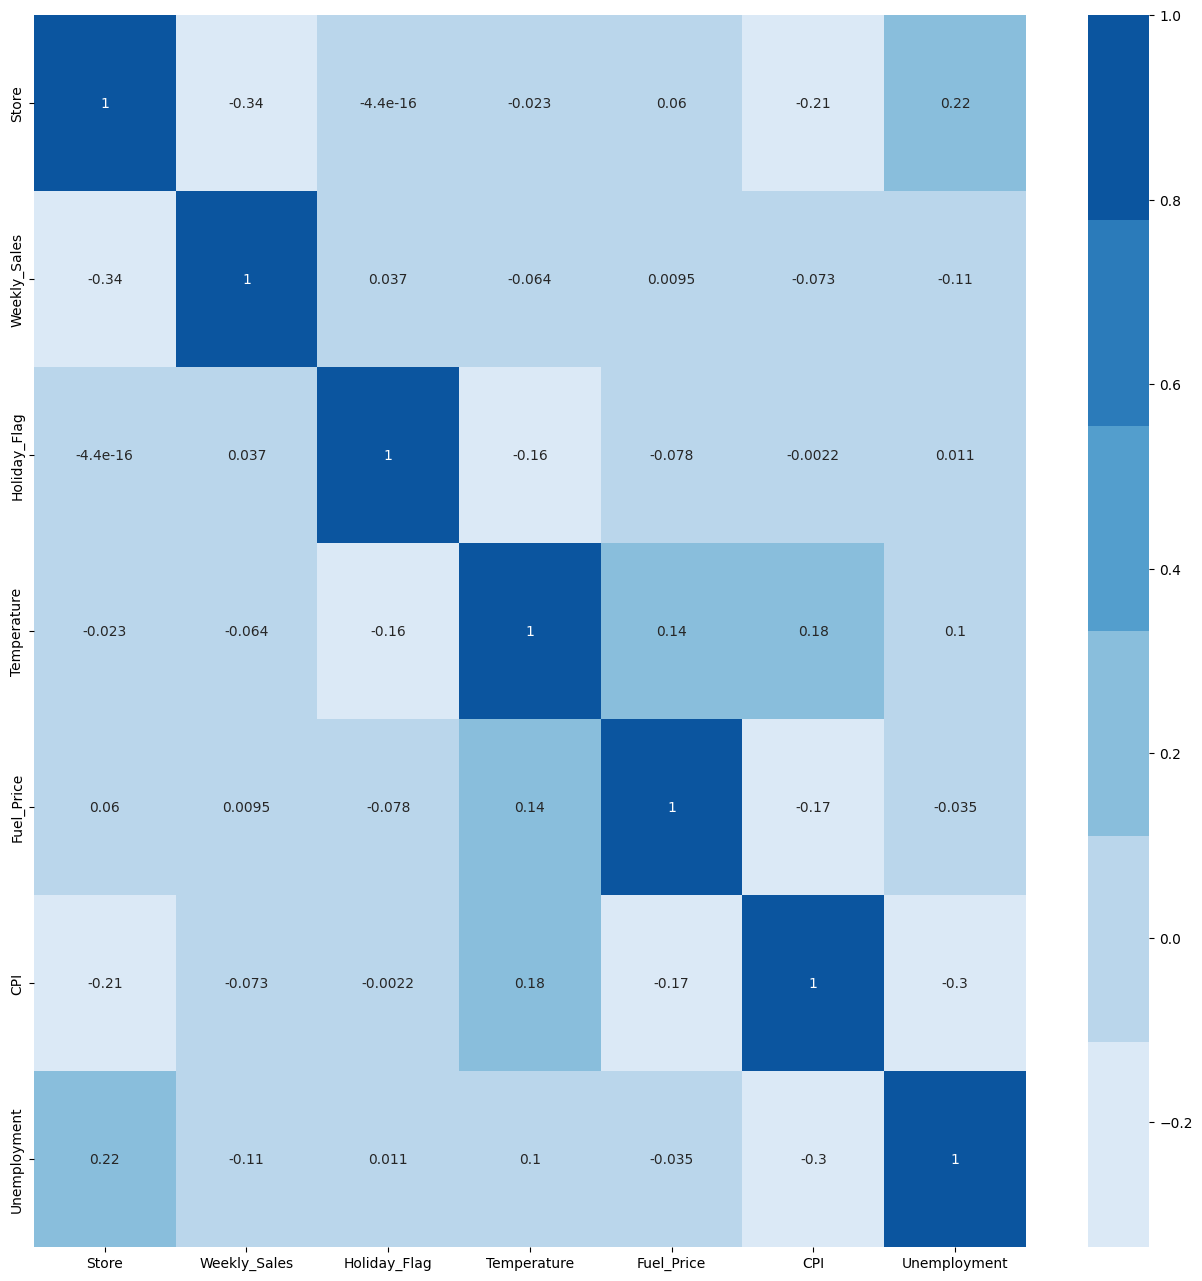

In [11]:
#check the correlation of dataset
DataCorr = data_df.corr()

plt.subplots( figsize = (16,16))
sns.heatmap( DataCorr, annot = True, cmap = sns.color_palette('Blues'))

In [12]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


no missing value that no need any operation for missing values so we will complete

In [13]:
data_df.describe() # her we check the range of numerical data expect col data it is object

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [14]:
data_df.dtypes # you can see the data that type object then can not deal with it

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

In [15]:
print(f"first day: {data_df['Date'].min()}")
print(f"last day: {data_df['Date'].max()}")

first day: 01-04-2011
last day: 31-12-2010


the date column not impact so i can drop it

In [16]:
data_df=data_df.drop('Date', axis=1)

In [17]:
data_df.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,1554806.68,0,46.50,2.625,211.350143,8.106


In [18]:
data_df_norm = ((data_df - data_df.mean())/data_df.std()) #make normalization

In [19]:
data_df_norm.head() #you can see the dataset in same range after normaliztion

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,-1.693847,1.057338,-0.274183,-0.995058,-1.713667,1.004097,0.056959
1,-1.693847,1.054266,3.646633,-1.201077,-1.765952,1.007802,0.056959
2,-1.693847,1.001128,-0.274183,-1.124091,-1.840023,1.008996,0.056959
3,-1.693847,0.642778,-0.274183,-0.760848,-1.737631,1.009771,0.056959
4,-1.693847,0.899844,-0.274183,-0.767896,-1.598203,1.010546,0.056959


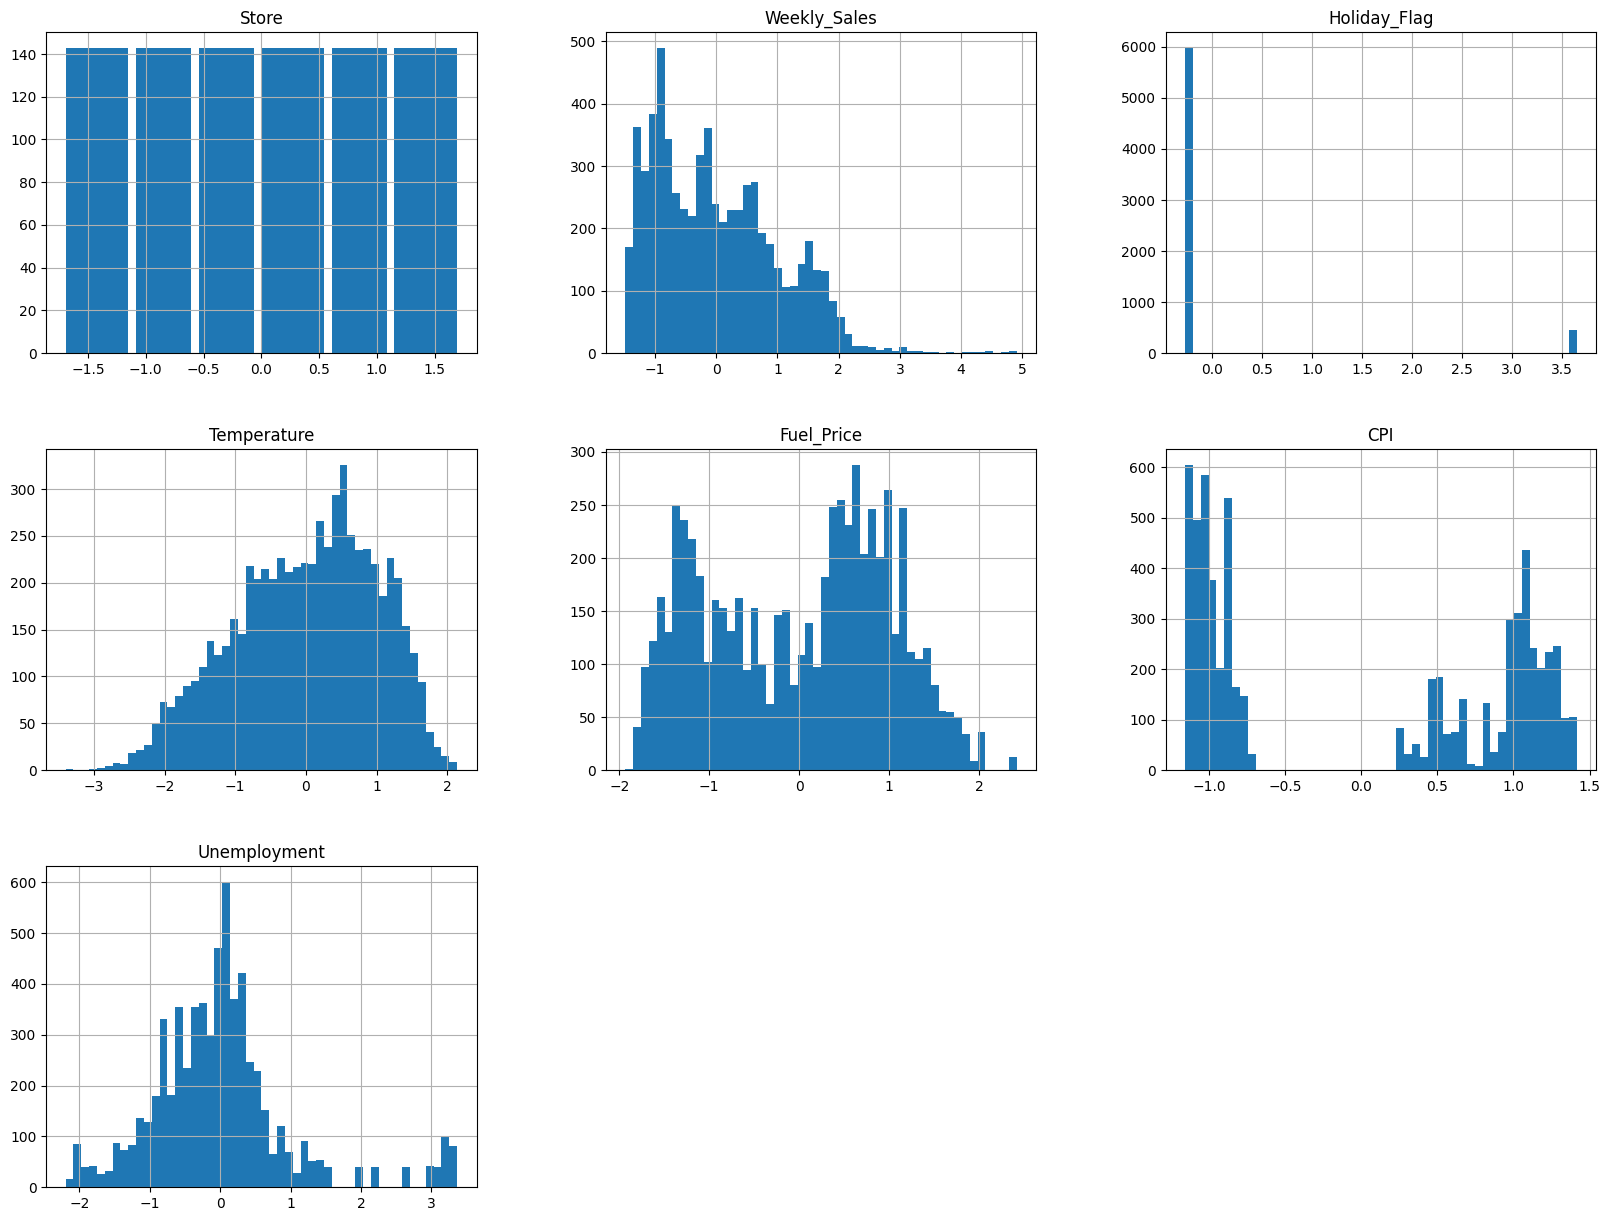

In [20]:
#Numerical Features Histograms (Train)
num_feats = list(data_df_norm.select_dtypes(include=['int64', 'float64', 'int32']).columns)
data_df_norm[num_feats].hist(figsize=(20,15),bins=50);

In [21]:
x_label = data_df_norm[['CPI','Store','Temperature','Fuel_Price','Unemployment' ]]# feature choose high correlation


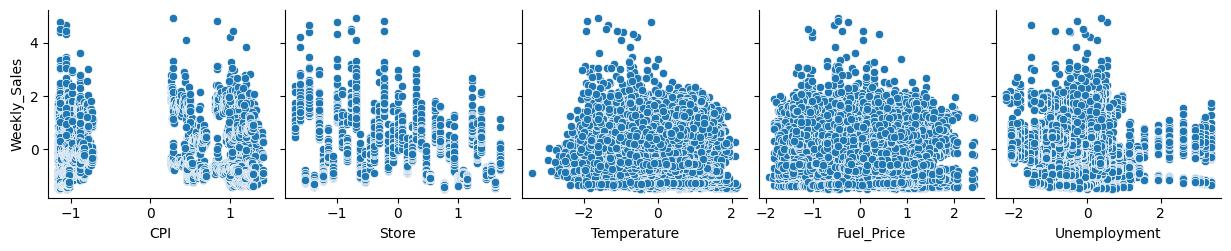

In [22]:
pp = sns.pairplot (data = data_df_norm, x_vars = ['CPI','Store','Temperature','Fuel_Price','Unemployment'], y_vars = 'Weekly_Sales' )

In [23]:
#now we buld the model
x_label = np.array(x_label) #convert to numpy
X_train, X_test, y_train, y_test = train_test_split(x_label,data_y,test_size=0.2, random_state=42) #split dataset

In [24]:
print(X_test.shape)
print(y_test.shape)

print(X_train.shape)
print(y_train.shape)

(1287, 5)
(1287,)
(5148, 5)
(5148,)


In [25]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [26]:
# the coefficients
lm.coef_

array([ -90762.3648118 , -196092.95787567,  -17067.52025589,
         -3022.18454812,  -45508.09225012])

In [27]:
predictions = lm.predict(X_test)#to predict

In [28]:
predictions

array([1205235.93688979, 1098495.11506499, 1266791.49753317, ...,
        701273.59605068, 1270869.95728453, 1299144.08940756])

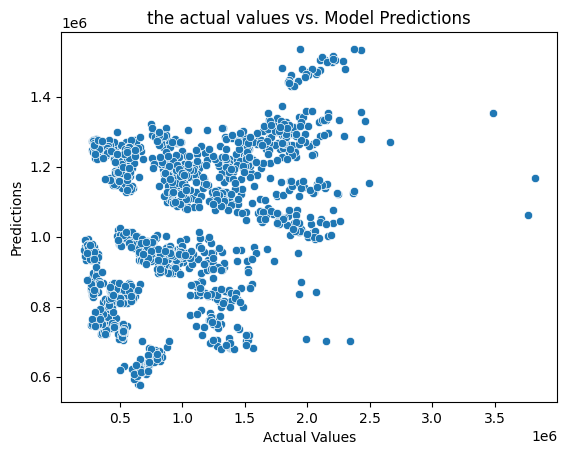

In [29]:
# Scatter plot of actual values of y vs predicted values.
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# convert y_test and predictions to DataFrame
df = pd.DataFrame({'Actual Values': y_test, 'Predictions': predictions})

# Scatter plot of actual values of y vs predicted values.
sns.scatterplot(x='Actual Values', y='Predictions', data=df)
plt.xlabel("Actual Values")
plt.ylabel('Predictions')
plt.title('the actual values vs. Model Predictions')
plt.show()

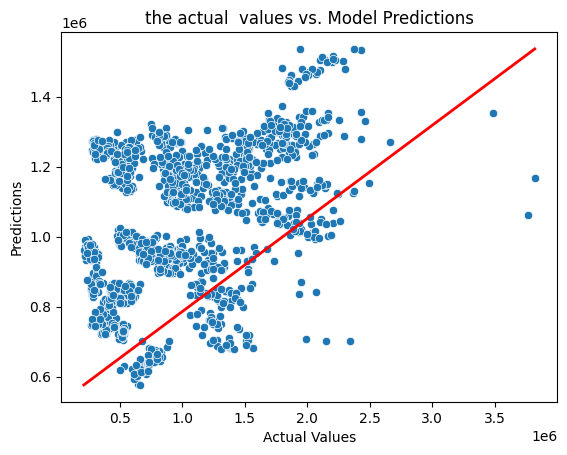

In [30]:
# Draw the regression line
# Scatter plot of actual values of y vs predicted values.
sns.scatterplot(x='Actual Values', y='Predictions', data=df)
plt.xlabel("Actual Values")
plt.ylabel('Predictions')
plt.title('the actual  values vs. Model Predictions')
plt.plot([min(df['Actual Values']), max(df['Actual Values'])], [min(df['Predictions']), max(df['Predictions'])], color='red', linewidth=2)
plt.show()

In [31]:
#here when we want  build from scratch
'''def Train_MLE ( TrainFeatueX, TrainLabel_y ):
    w = ((np.linalg.inv(TrainFeatueX.T@TrainFeatueX))@TrainFeatueX.T@TrainLabel_y)
    return w

def MLE_Predict (x_test, W):
    pred = x_test@W.T
    return pred'''

'def Train_MLE ( TrainFeatueX, TrainLabel_y ):\n    w = ((np.linalg.inv(TrainFeatueX.T@TrainFeatueX))@TrainFeatueX.T@TrainLabel_y)\n    return w\n\ndef MLE_Predict (x_test, W):\n    pred = x_test@W.T\n    return pred'

In [32]:
'''Coffi = Train_MLE(X_train,y_train)
predict_MLE = MLE_Predict(X_test,Coffi)'''

'Coffi = Train_MLE(X_train,y_train)\npredict_MLE = MLE_Predict(X_test,Coffi)'

## Evaluation of the model

In [33]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
import math

In [34]:
print('Mean Absolute Error:',mean_absolute_error(y_test, predictions))
print('Mean Squared Error:',mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:',math.sqrt(mean_squared_error(y_test, predictions)))
print('R2',r2_score(y_test,predictions))

Mean Absolute Error: 433132.1115763454
Mean Squared Error: 274715879310.8413
Root Mean Squared Error: 524133.4556301871
R2 0.14725442545514245


In [35]:
#Tasks
#1) Train a linear regression model
#2) Show the training loss
#3) Show the test MSE
